## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [33]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [34]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,507
4,2008-08-01 00:00:00,c++,163


In [35]:
df.tail()

,DATE,TAG,POSTS
2267,2022-03-01 00:00:00,php,4768
2268,2022-03-01 00:00:00,python,27304
2269,2022-03-01 00:00:00,r,5365
2270,2022-03-01 00:00:00,ruby,569
2271,2022-03-01 00:00:00,swift,2285


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [29]:
df.shape

(2273, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [30]:
df.count()

DATE     2273
TAG      2273
POSTS    2272
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [32]:
df.groupby('TAG').sum()

,POSTS
TAG,
TagName,0.0
assembly,39930.0
c,376789.0
c#,1529781.0
c++,759119.0
delphi,49415.0
go,60469.0
java,1835735.0
javascript,2353943.0


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [36]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,164,164
c,164,164
c#,165,165
c++,164,164
delphi,164,164
go,149,149
java,164,164
javascript,164,164
perl,164,164


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [43]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [44]:
df

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,507
4,2008-08-01,c++,163
...,...,...,...
2267,2022-03-01,php,4768
2268,2022-03-01,python,27304
2269,2022-03-01,r,5365
2270,2022-03-01,ruby,569


## Data Manipulation



In [48]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,507.0,163.0,14.0,NaN,222.0,164.0,28.0,160.0,121.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1648.0,754.0,105.0,NaN,1136.0,639.0,131.0,480.0,538.0,6.0,288.0,NaN
2008-10-01,15.0,303.0,1990.0,810.0,112.0,NaN,1154.0,726.0,127.0,615.0,508.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,579.0,97.0,502.0,452.0,1.0,159.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-01,311.0,2340.0,6394.0,4174.0,151.0,704.0,8283.0,15856.0,81.0,4133.0,23410.0,4625.0,449.0,1762.0
2021-12-01,288.0,2265.0,5730.0,3872.0,159.0,771.0,7552.0,15320.0,103.0,3749.0,22090.0,3925.0,436.0,1672.0
2022-01-01,241.0,2071.0,5937.0,3900.0,151.0,796.0,7746.0,16366.0,131.0,4043.0,22712.0,4268.0,477.0,2001.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [49]:
reshaped_df.shape

(165, 14)

In [50]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [51]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,507.0,163.0,14.0,NaN,222.0,164.0,28.0,160.0,121.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1648.0,754.0,105.0,NaN,1136.0,639.0,131.0,480.0,538.0,6.0,288.0,NaN
2008-10-01,15.0,303.0,1990.0,810.0,112.0,NaN,1154.0,726.0,127.0,615.0,508.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,579.0,97.0,502.0,452.0,1.0,159.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [52]:
reshaped_df.count()

TAG
assembly      164
c             164
c#            165
c++           164
delphi        164
go            149
java          164
javascript    164
perl          164
php           164
python        164
r             162
ruby          164
swift         156
dtype: int64

In [53]:
reshaped_df.fillna(0, inplace=True)

In [54]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [71]:
import matplotlib.pyplot as plt

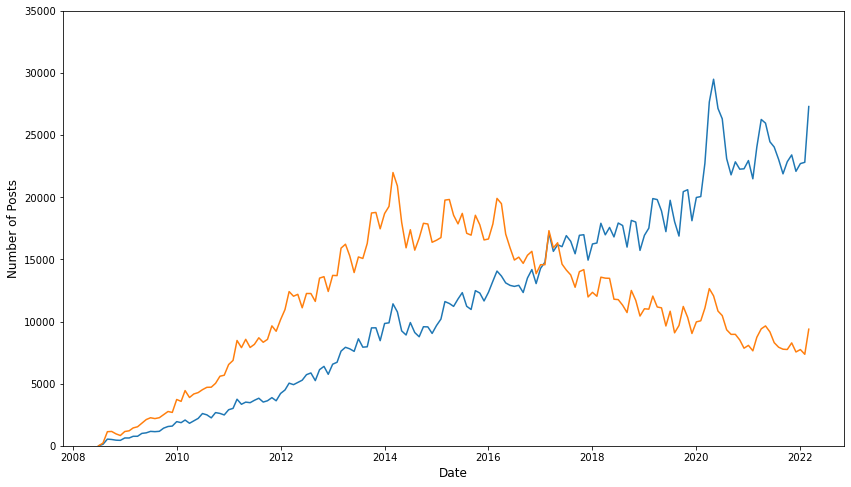

In [94]:
plt.figure(figsize=(14, 8))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)
plt.ylim(0, 35000)

plt.plot(reshaped_df['python'])
plt.plot(reshaped_df['java'])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

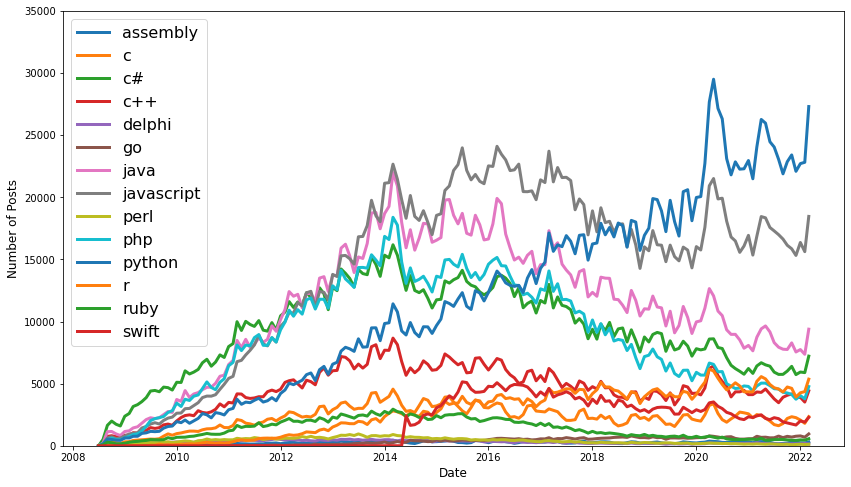

In [102]:
plt.figure(figsize=(14, 8))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df[column], linewidth=3, label=reshaped_df[column].name)
plt.legend(fontsize=16)     

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

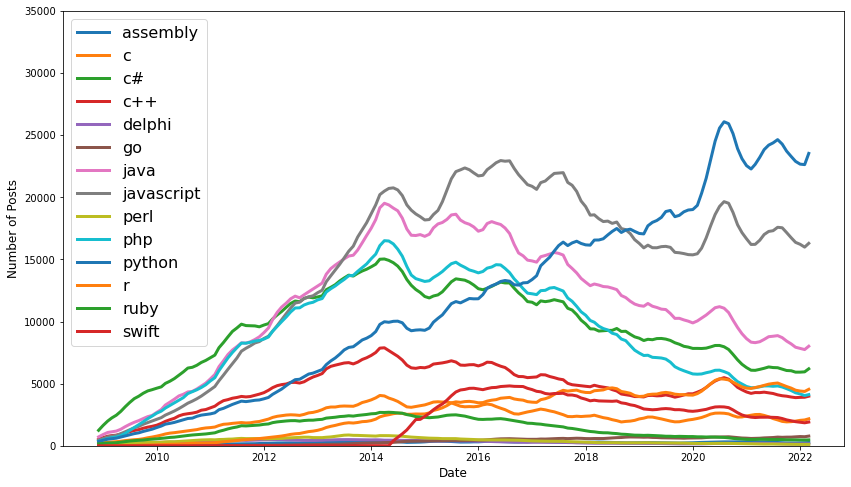

In [103]:
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(14, 8))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(roll_df[column], linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)     

In [104]:
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,507.0,163.0,14.0,0.0,222.0,164.0,28.0,160.0,121.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1648.0,754.0,105.0,0.0,1136.0,639.0,131.0,480.0,538.0,6.0,288.0,0.0
2008-10-01,15.0,303.0,1990.0,810.0,112.0,0.0,1154.0,726.0,127.0,615.0,508.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1733.0,734.0,141.0,0.0,958.0,579.0,97.0,502.0,452.0,1.0,159.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-01,311.0,2340.0,6394.0,4174.0,151.0,704.0,8283.0,15856.0,81.0,4133.0,23410.0,4625.0,449.0,1762.0
2021-12-01,288.0,2265.0,5730.0,3872.0,159.0,771.0,7552.0,15320.0,103.0,3749.0,22090.0,3925.0,436.0,1672.0
2022-01-01,241.0,2071.0,5937.0,3900.0,151.0,796.0,7746.0,16366.0,131.0,4043.0,22712.0,4268.0,477.0,2001.0


In [110]:
reshaped_df.loc['2015-01-01':'2018-01-01'].sum()

TAG
assembly       11811.0
c             107244.0
c#            443680.0
c++           217689.0
delphi         11541.0
go             19216.0
java          598062.0
javascript    787749.0
perl           16067.0
php           482796.0
python        503113.0
r             140065.0
ruby           70447.0
swift         158311.0
dtype: float64

In [111]:
reshaped_df.loc['2020-01-01':'2020-12-31'].sum()

TAG
assembly        3710.0
c              29687.0
c#             87811.0
c++            58333.0
delphi          2243.0
go              8002.0
java          120801.0
javascript    214627.0
perl            2164.0
php            66310.0
python        285737.0
r              60029.0
ruby            7476.0
swift          33654.0
dtype: float64

In [46]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


In [47]:
pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50
